In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
df_delay = pd.read_excel('get_around_delay_analysis.xlsx')
df_pricing = pd.read_csv('get_around_pricing_project.csv' , index_col='Unnamed: 0')

In [3]:
display(df_delay.head())
display(df_pricing.head())

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
# Checking if there are missing values
display(df_delay.isna().sum())

print("/......................................../")

display(df_pricing.isna().sum())

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

/......................................../


model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

# EDA about pricing

In [5]:
df_pricing.describe(include='all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


## Take a look at the distribution of the rental price

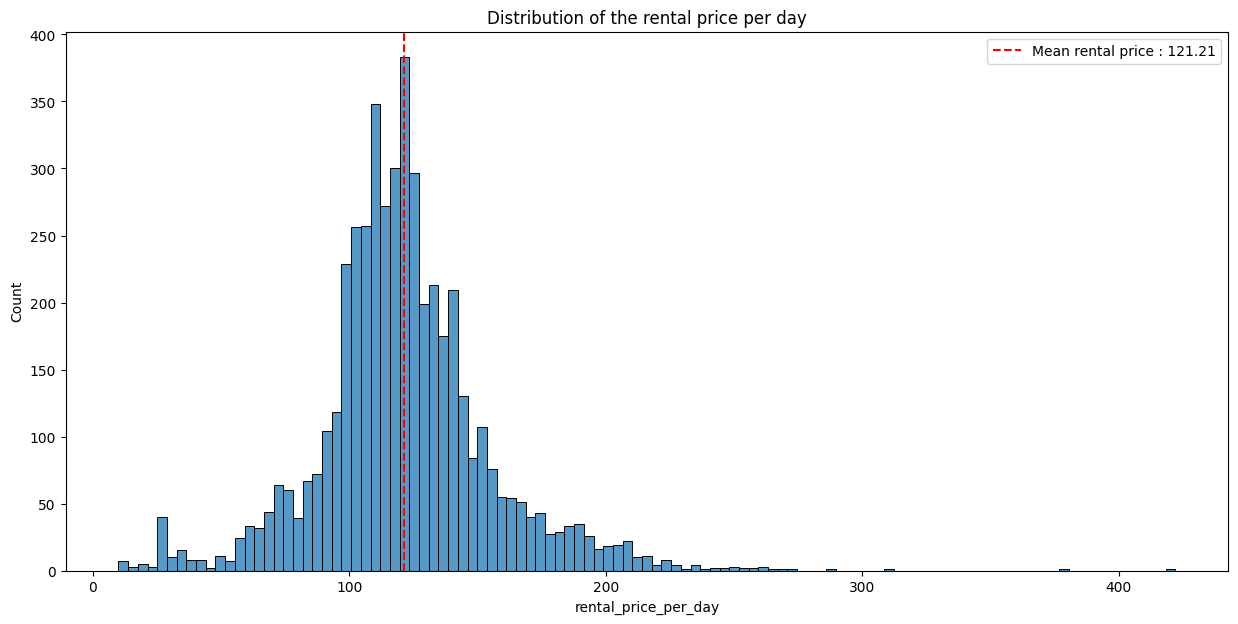

In [6]:
mean_price_per_day = round(df_pricing['rental_price_per_day'].mean(), 2)
plt.figure(figsize=(15,7))
sns.histplot(df_pricing['rental_price_per_day'] , fill=True)
plt.axvline(mean_price_per_day , color='red' , linestyle='--' , label=f'Mean rental price : {mean_price_per_day}')
plt.legend()
plt.title('Distribution of the rental price per day')
plt.show()

<ipython-input-7-0eb22569d297>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



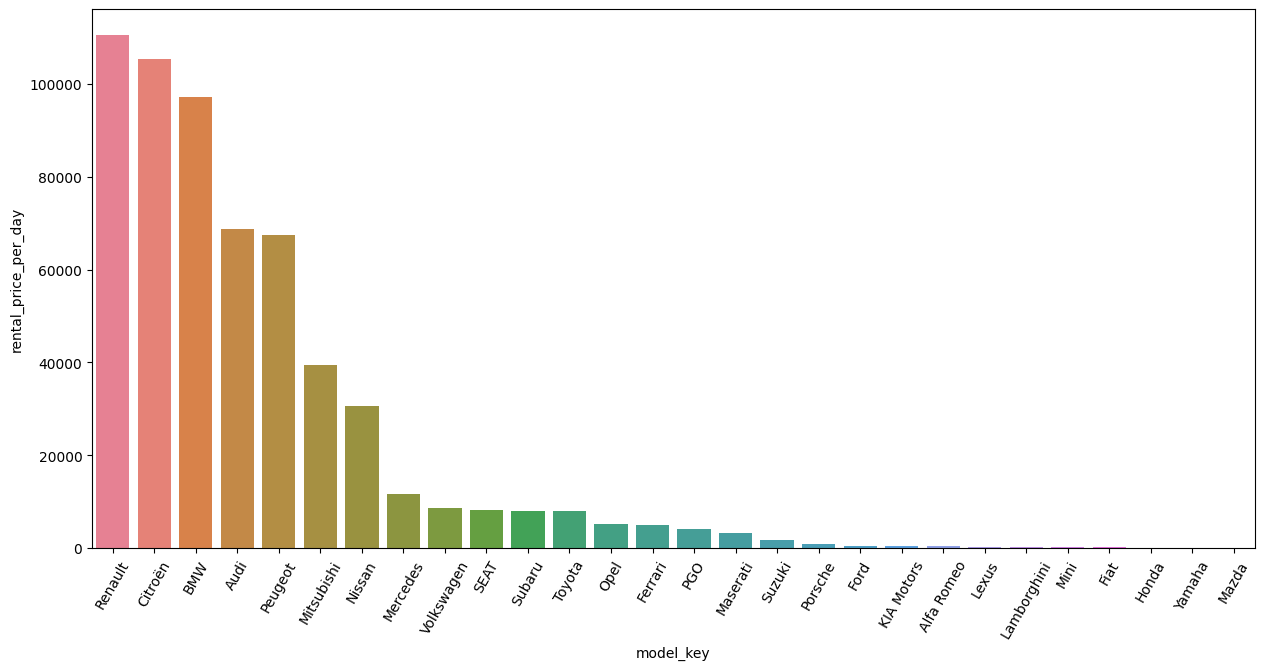

In [7]:
df_rental_car = df_pricing.groupby('model_key').sum().sort_values('rental_price_per_day',ascending=False)

plt.figure(figsize=(15,7))
sns.barplot(x=df_rental_car.index, y=df_rental_car['rental_price_per_day'],palette='husl')
plt.xticks(rotation=60)
plt.show()

## It's interesting to see that the most profitable cars are french and german's cars with in top 3 (Renault, Citroën, BMW). We can check now if it's the same when we focus on the average price per car per day.

<ipython-input-8-5b609b27b6c1>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



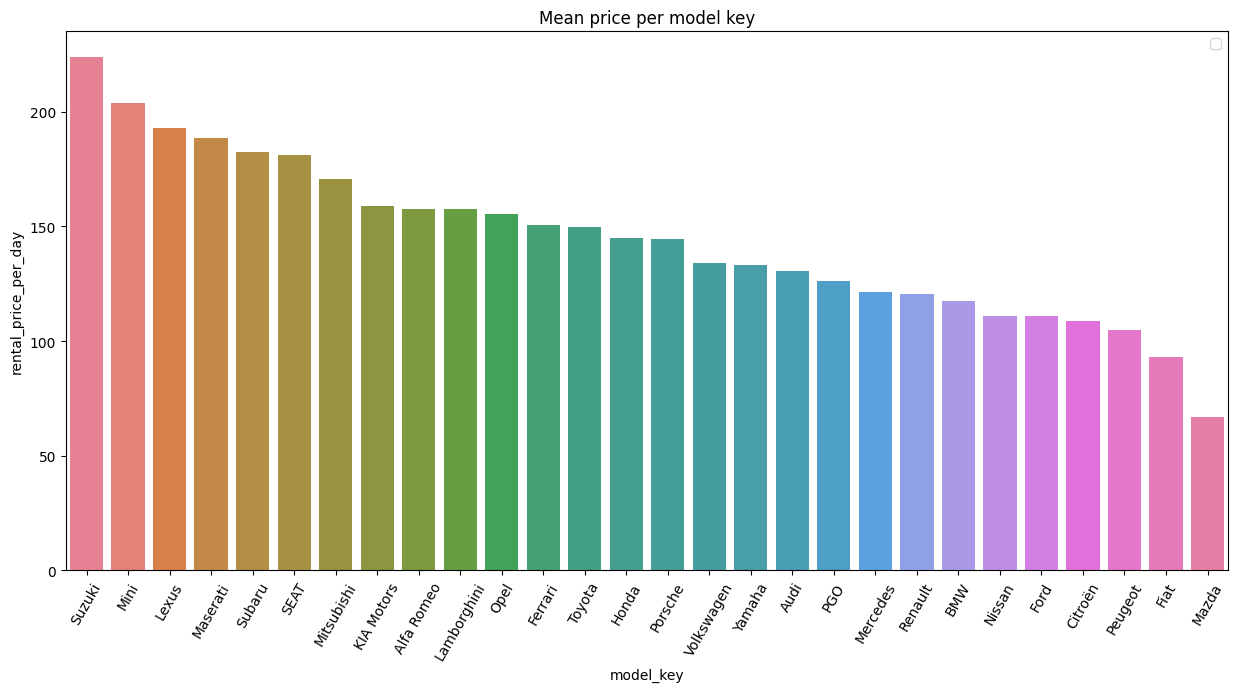

In [8]:

df_rental_avg_car = df_pricing.groupby('model_key').mean().sort_values('rental_price_per_day',ascending=False)

plt.figure(figsize=(15,7))
sns.barplot(x=df_rental_avg_car.index, y=df_rental_avg_car['rental_price_per_day'],palette='husl')
plt.xticks(rotation=60)
plt.title('Mean price per model key')
plt.legend()
plt.show()

## We can see that the car's brand which have the highest average price per day is Suzuki, Mini and Lexus (two of them are japan's car). Maybe, most of this car are hybrid and so more efficient for the environment but also more rare. So let's take a look at the fuel type.

<ipython-input-9-308782b7fed7>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



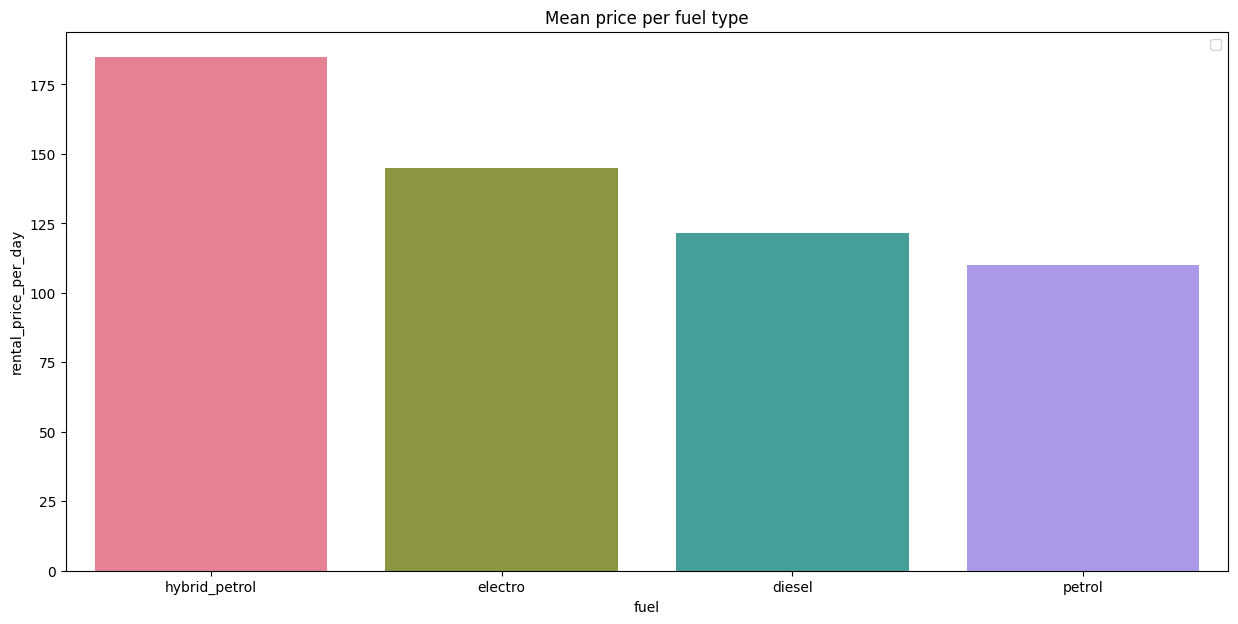

In [9]:
df_rental_avg_fuel_type = df_pricing.groupby('fuel').mean().sort_values('rental_price_per_day',ascending=False)

plt.figure(figsize=(15,7))
sns.barplot(x=df_rental_avg_fuel_type.index, y=df_rental_avg_fuel_type['rental_price_per_day'],palette='husl')
plt.title('Mean price per fuel type')
plt.legend()
plt.show()

In [10]:
data = df_pricing.groupby(['fuel','model_key'])['fuel'].count()
data

fuel           model_key  
diesel         Alfa Romeo       3
               Audi           516
               BMW            789
               Citroën        913
               Ferrari         33
               Fiat             2
               Ford             5
               KIA Motors       3
               Lamborghini      1
               Lexus            2
               Maserati        16
               Mercedes        97
               Mitsubishi     225
               Nissan         273
               Opel            33
               PGO             33
               Peugeot        608
               Renault        884
               SEAT            46
               Subaru          41
               Suzuki           7
               Toyota          51
               Volkswagen      59
               Yamaha           1
electro        Porsche          3
hybrid_petrol  Honda            1
               Mitsubishi       2
               Porsche          3
               Renaul

In [11]:
data = df_pricing.groupby(['fuel'])['model_key'].count()
data

fuel
diesel           4641
electro             3
hybrid_petrol       8
petrol            191
Name: model_key, dtype: int64

## We can see the rental price with hybrid car is more expensive that diesel or petrol. But about our top 3 of car's brand which highest average price, none of them are hybrid. The fact that the rental price for hybrid car is high is probably because we have 3 porsche on the 7 hybrid car and it's pretty rare.
## On the other hand, we can see most of the car are diesel type. It's logical because thanks to diesel's car, you can drive longer than other type of vehicle.

<ipython-input-12-b76aef10a15e>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



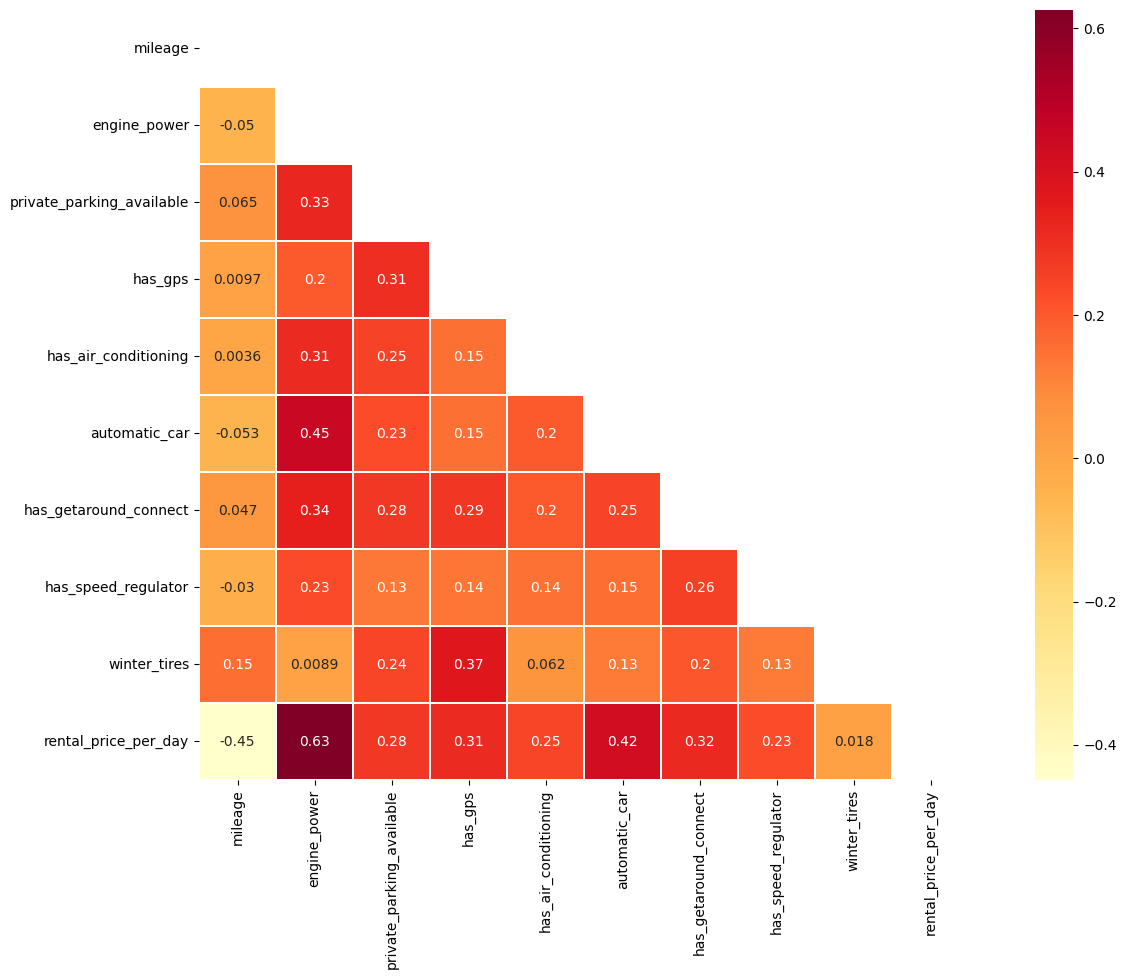

In [12]:
plt.figure(figsize=(17,10))

corr_mx = df_pricing.corr()
matrix = np.triu(corr_mx) # take upper correlation matrix

sns.heatmap(corr_mx, mask=matrix,annot=True, cmap = 'YlOrRd', linewidths=0.1, square=True)
plt.show()

## The corr matrix point out vehicle with powerful engine, automatic gearbox and few mileage is rented higher than the other.

# EDA about delay

In [13]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [14]:
df_delay.describe(include = 'all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


## Take a look at the distribution of some features

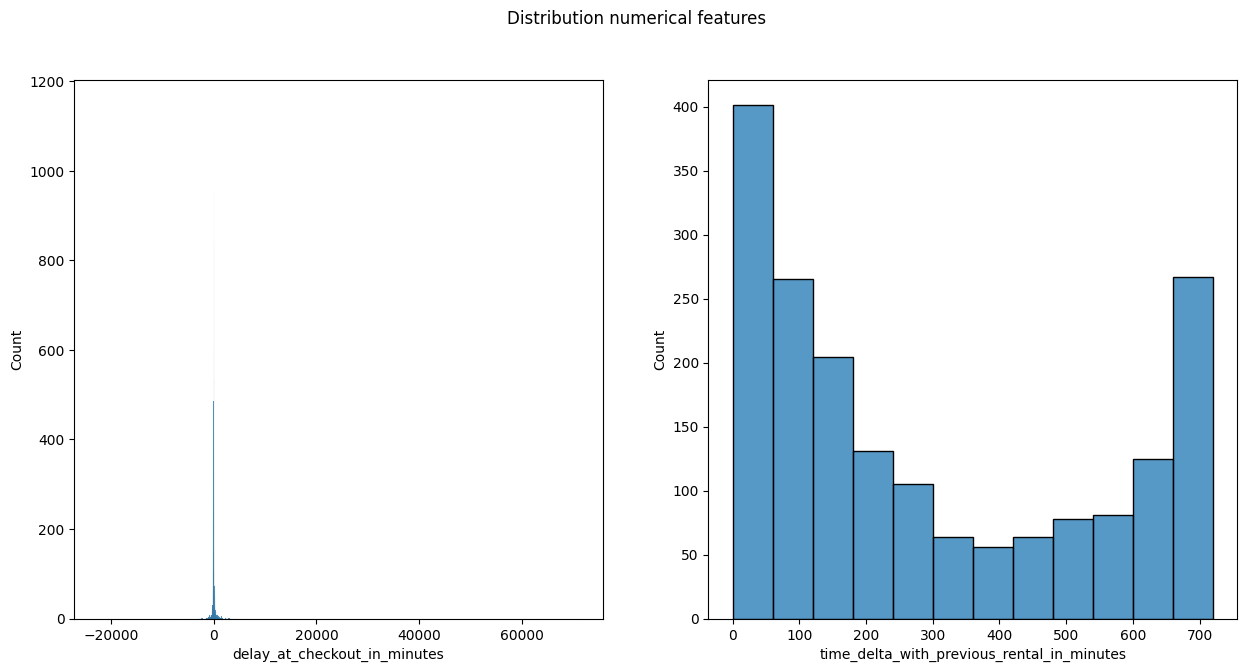

In [15]:
fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize=(15,7))
sns.histplot(df_delay['delay_at_checkout_in_minutes'], fill=True , ax=ax1)
sns.histplot(df_delay['time_delta_with_previous_rental_in_minutes'], fill=True , ax=ax2)
fig.suptitle('Distribution numerical features')
plt.show()

## The distribution of the delay at checkout is not adjustable so let's focus on a smaller perimeter than this one.

Focus distribution


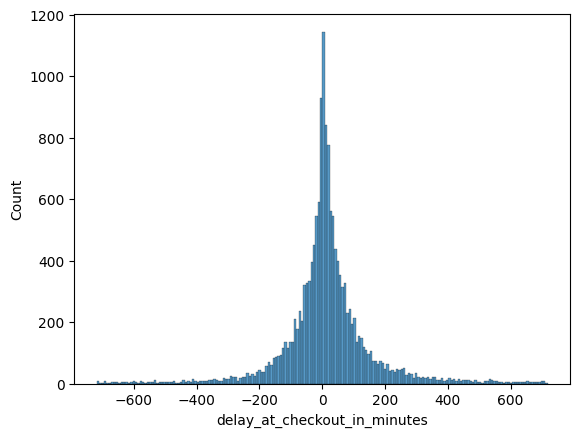

In [16]:
bound_sup = df_delay['delay_at_checkout_in_minutes'] < 720. # i.e 12 hours
bound_inf = df_delay['delay_at_checkout_in_minutes'] > -720.

print('Focus distribution')

sns.histplot(df_delay.loc[bound_sup&bound_inf,:], x= 'delay_at_checkout_in_minutes')
plt.show()

## Let's deal with outliers and uncomplete rows

In [17]:
to_keep = df_delay[['delay_at_checkout_in_minutes']].dropna().index
df_delay = df_delay[df_delay.index.isin(to_keep)].reset_index(drop=True)

In [18]:
df_delay['delay_at_checkout_in_minutes'].describe()

count    16346.000000
mean        59.701517
std       1002.561635
min     -22433.000000
25%        -36.000000
50%          9.000000
75%         67.000000
max      71084.000000
Name: delay_at_checkout_in_minutes, dtype: float64

### We see that min and max are very high and low, let's see wtih a boxplot and deal with after.

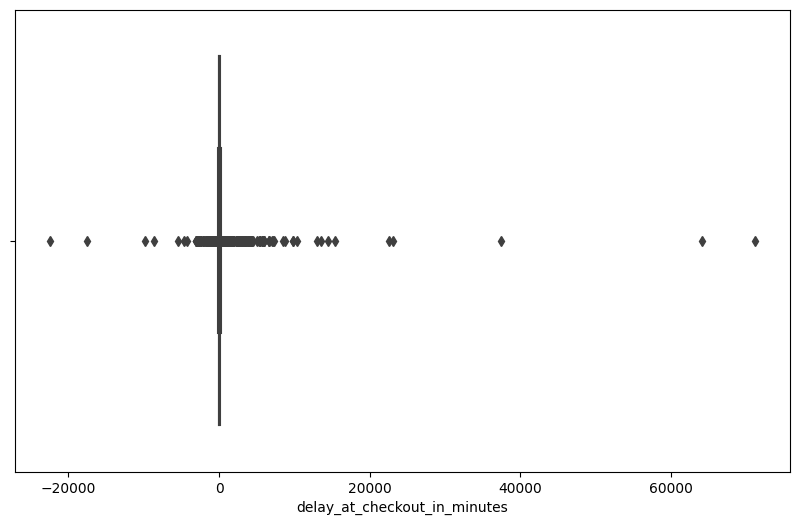

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(df_delay, x='delay_at_checkout_in_minutes')
plt.show()

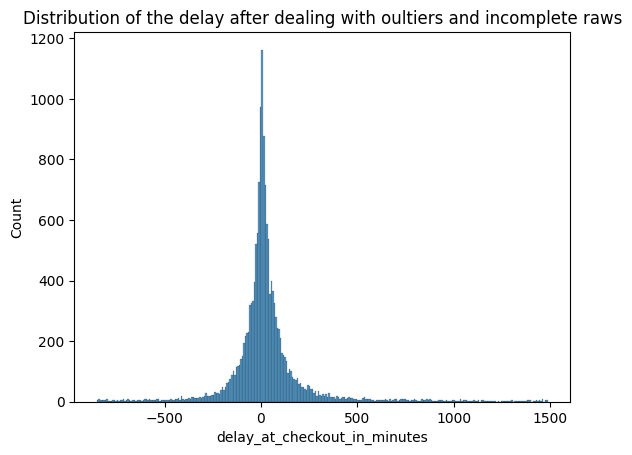

In [20]:
bound1 = df_delay['delay_at_checkout_in_minutes'] <= df_delay['delay_at_checkout_in_minutes'].quantile(0.01)
bound2 = df_delay['delay_at_checkout_in_minutes'] >= df_delay['delay_at_checkout_in_minutes'].quantile(0.99)
df_delay_clean = df_delay.loc[~ (bound1 | bound2),:]


sns.histplot(df_delay_clean, x= 'delay_at_checkout_in_minutes')
plt.title('Distribution of the delay after dealing with oultiers and incomplete raws')
plt.show()

In [21]:
print(df_delay_clean['delay_at_checkout_in_minutes'].describe())

count    16016.000000
mean        31.765297
std        214.883059
min       -852.000000
25%        -35.000000
50%          9.000000
75%         65.000000
max       1490.000000
Name: delay_at_checkout_in_minutes, dtype: float64


## Now create a feature to classify time of the delay.

In [22]:
delay_interval = []
for delay in df_delay_clean['delay_at_checkout_in_minutes']:
    if delay < 0 :
        delay_interval.append('A- No delay')
    elif delay == 0 :
        delay_interval.append('B- Perfect time')
    elif delay < 15 :
        delay_interval.append('C- Delay < 15 mins')
    elif delay < 60 :
        delay_interval.append('D- Delay < 1 hour')
    elif delay > 60 :
        delay_interval.append('E- Delay > 1 hour')
    else:
        delay_interval.append("F- It's too late")

df_delay_clean['Late'] = [1 if delay > 0 else 0 for delay in df_delay_clean['delay_at_checkout_in_minutes']]
df_delay_clean['delay_interval'] = delay_interval



<ipython-input-22-6192b687b367>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-6192b687b367>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_delay_clean = df_delay_clean.sort_values('delay_interval')

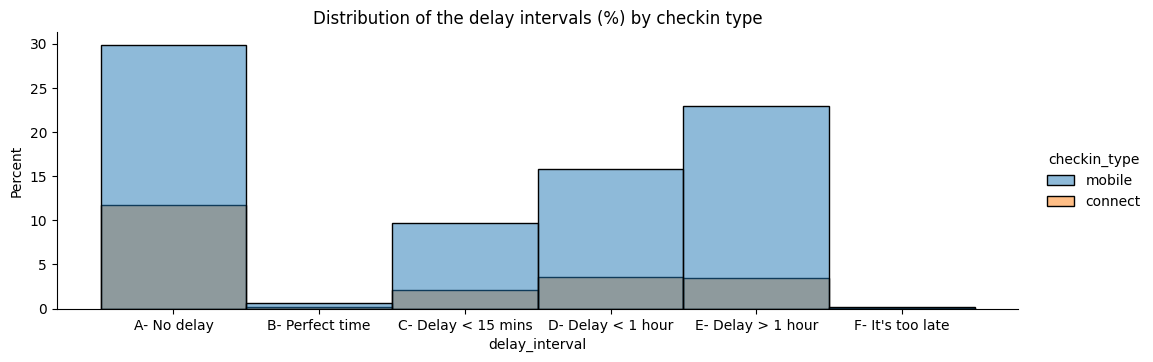

In [24]:
sns.displot(df_delay_clean, x= 'delay_interval',stat='percent',
            hue='checkin_type',  height=3.5, aspect=3.)
plt.title('Distribution of the delay intervals (%) by checkin type')
plt.show()


In [25]:
df_positive = df_delay_clean[df_delay_clean['delay_at_checkout_in_minutes'] >0] #just keep positive delay to compute mean
delay_time = df_positive['delay_at_checkout_in_minutes'].sum()/len(df_positive)
print(f"Drivers are late with {round(delay_time,2)} minutes on average")

Drivers are late with 124.32 minutes on average


## Let's define a fair treshhold between checkout and a new checkin

In [26]:
df_diff = df_delay_clean.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
df_diff['Gap_Delay'] = df_diff['time_delta_with_previous_rental_in_minutes'] - df_diff['delay_at_checkout_in_minutes']
#incident = len(df_diff[df_diff['Gap_delay'] < 0])

<ipython-input-26-322bd66c4d73>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# Create Dataframe by checkin type

connect_df = df_diff[df_diff['checkin_type'] == 'connect']
mobile_df = df_diff[df_diff['checkin_type'] == 'mobile']

connect_sub = connect_df[['time_delta_with_previous_rental_in_minutes']].dropna()
mobile_sub = mobile_df[['time_delta_with_previous_rental_in_minutes']].dropna()


thresholds = np.arange(0, 60*12, step=15) # 15min intervals for 12 hours

#Create empty list

list_mobile_to_plot = []
list_connect_to_plot = []

total_list = []
for thr in thresholds:
    connect =  connect_sub[connect_sub['time_delta_with_previous_rental_in_minutes'] <= thr]
    mobile =  mobile_sub[mobile_sub['time_delta_with_previous_rental_in_minutes'] <= thr]

    list_mobile_to_plot.append(len(mobile))
    list_connect_to_plot.append(len(connect))

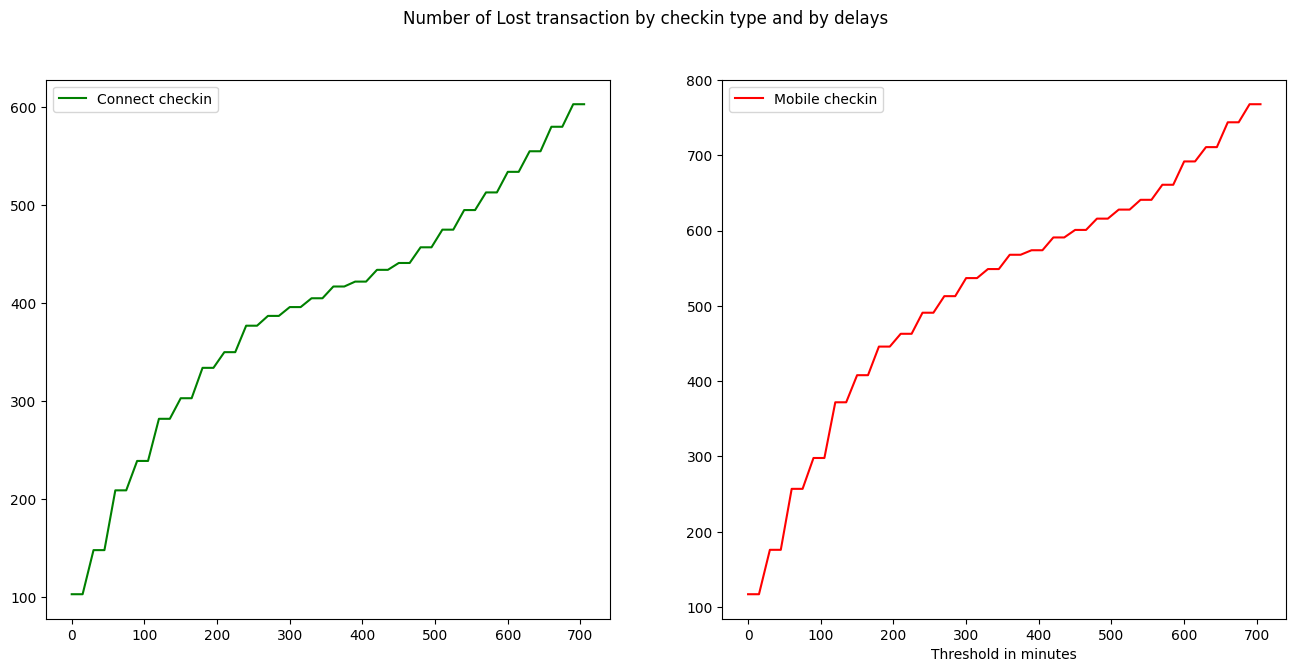

In [33]:
fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize=(16,7))

ax1.plot(thresholds , list_connect_to_plot , color='green' , label='Connect checkin')
ax2.plot(thresholds , list_mobile_to_plot , color='red' , label='Mobile checkin')

ax1.legend()
ax2.legend()

plt.xlabel('Threshold in minutes')

fig.suptitle('Number of Lost transaction by checkin type and by delays')

plt.show()



## We can see that number of lost transaction starts to slow down with a delay > 180 minutes for both. We can check what is the delay which allow us to say that the problem is solved.

In [34]:
thresholds = np.arange(0, 60*12, step=15) # 15min intervals for 12 hours

#Create empty list

list_mobile_solved_to_plot = []
list_connect_solved_to_plot = []

total_list = []
for thr in thresholds:

    solved = df_diff[df_diff['Gap_Delay'] < 0]
    connect_solved = solved[solved['checkin_type'] == 'connect']
    mobile_solved = solved[solved['checkin_type'] == 'mobile']
    connect_solved = connect_solved[connect_solved['delay_at_checkout_in_minutes'] < thr]
    mobile_solved = mobile_solved[mobile_solved['delay_at_checkout_in_minutes'] < thr]

    list_mobile_solved_to_plot.append(len(mobile_solved))
    list_connect_solved_to_plot.append(len(connect_solved))

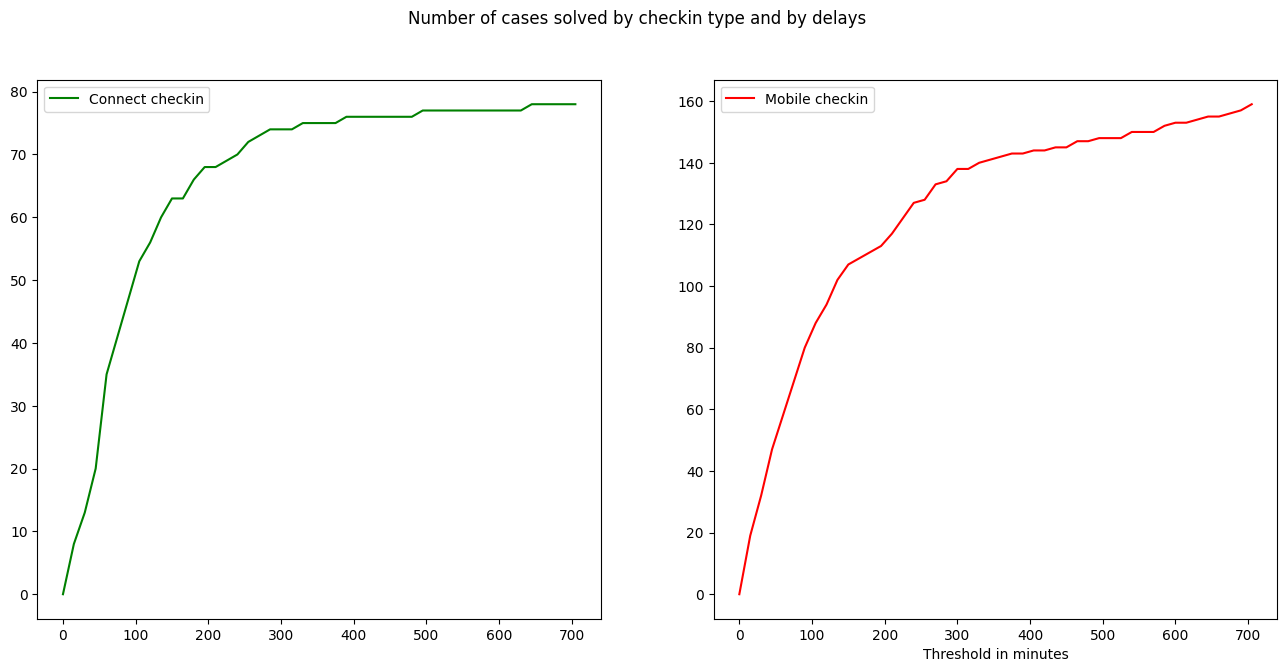

In [35]:
fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize=(16,7))

ax1.plot(thresholds , list_connect_solved_to_plot , color='green' , label='Connect checkin')
ax2.plot(thresholds , list_mobile_solved_to_plot , color='red' , label='Mobile checkin')

ax1.legend()
ax2.legend()

plt.xlabel('Threshold in minutes')

fig.suptitle('Number of cases solved by checkin type and by delays')

plt.show()

## We can see that the curve of cases solved start to slow significantly after 110 minutes.